### Decision Tree Regression - Regression Tree

Source: [geeksforgeeks](https://www.geeksforgeeks.org/python-decision-tree-regression-using-sklearn/)
We will generate a regression tree using a synthetic dataset. The procedure is to find the mean of the sample subspace generated after partition. For achieving this we use the `sklearn.tree.DecisionTreeRegressor` model

In [1]:
# Library imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = np.array( 
[['Asset Flip', 100, 1000], 
['Text Based', 500, 3000], 
['Visual Novel', 1500, 5000], 
['2D Pixel Art', 3500, 8000], 
['2D Vector Art', 5000, 6500], 
['Strategy', 6000, 7000], 
['First Person Shooter', 8000, 15000], 
['Simulator', 9500, 20000], 
['Racing', 12000, 21000], 
['RPG', 14000, 25000], 
['Sandbox', 15500, 27000], 
['Open-World', 16500, 30000], 
['MMOFPS', 25000, 52000], 
['MMORPG', 30000, 80000] 
]) 
  
# print the dataset 
print(dataset)

[['Asset Flip' '100' '1000']
 ['Text Based' '500' '3000']
 ['Visual Novel' '1500' '5000']
 ['2D Pixel Art' '3500' '8000']
 ['2D Vector Art' '5000' '6500']
 ['Strategy' '6000' '7000']
 ['First Person Shooter' '8000' '15000']
 ['Simulator' '9500' '20000']
 ['Racing' '12000' '21000']
 ['RPG' '14000' '25000']
 ['Sandbox' '15500' '27000']
 ['Open-World' '16500' '30000']
 ['MMOFPS' '25000' '52000']
 ['MMORPG' '30000' '80000']]


In [3]:
X = dataset[:,1:2].astype(int)
Y = dataset[:,2].astype(int)
print(f'Independent Variable:\n{X}')
print(f'Target:\n{Y}')

Independent Variable:
[[  100]
 [  500]
 [ 1500]
 [ 3500]
 [ 5000]
 [ 6000]
 [ 8000]
 [ 9500]
 [12000]
 [14000]
 [15500]
 [16500]
 [25000]
 [30000]]
Target:
[ 1000  3000  5000  8000  6500  7000 15000 20000 21000 25000 27000 30000
 52000 80000]


In [4]:
# Fit the tree to the dataset
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X, Y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [5]:
for _ in range(10):
    val = np.random.randint(low=20,high=400)
    ypred = model.predict(np.array(val).reshape(1,-1))
    print(f'Predicted Price for {val}: {int(ypred[0])}')

Predicted Price for 212: 1000
Predicted Price for 329: 3000
Predicted Price for 353: 3000
Predicted Price for 366: 3000
Predicted Price for 237: 1000
Predicted Price for 201: 1000
Predicted Price for 364: 3000
Predicted Price for 174: 1000
Predicted Price for 98: 1000
Predicted Price for 155: 1000


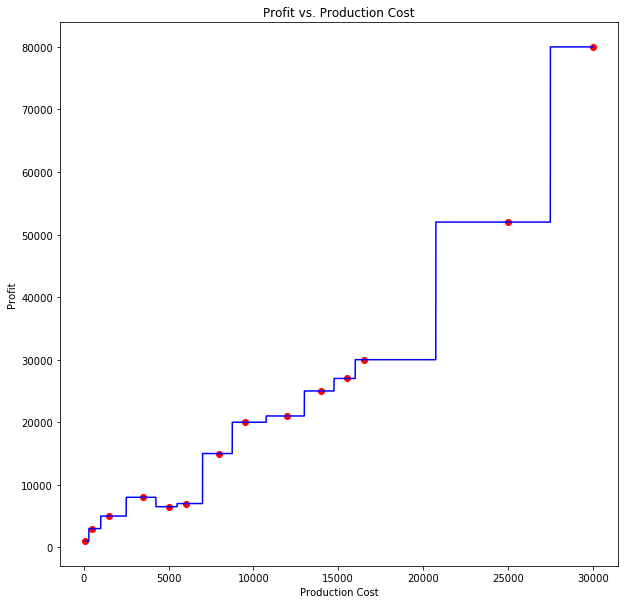

In [6]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.figure(figsize=(10,10))
plt.scatter(X, Y, color='red', label='Actual Value')
plt.plot(X_grid, model.predict(X_grid), color='blue', label='Predicted Value')
plt.title('Profit vs. Production Cost')
plt.xlabel('Production Cost'); plt.ylabel('Profit');
plt.show()

In [7]:
# import export_graphviz 
from sklearn.tree import export_graphviz

# export the decision tree to a tree.dot file 
# for visualizing the plot easily anywhere 
export_graphviz(model, out_file ='tree.dot', 
               feature_names =['Production Cost'])